# Plotting active learning

Imports

In [49]:
import pinot
import pinot.active
import torch
import numpy as np

Using backend: pytorch


### Plot results.

In [101]:
import pandas as pd
best_df = pd.read_csv('./best_GraphConv_Adam_q10.csv', index_col=0)
best_df['Number of Candidates Acquired'] = best_df['Step']

In [104]:
import os
rep = 'GraphConv'
home_dir = './adam_results'
home_dir_list = os.listdir(home_dir)
folders = [h for h in home_dir_list if rep in h]
paths = [f'{home_dir}/{f}/best_{rep}_Adam.csv' for f in folders]
best_df = pd.concat([pd.read_csv(p, index_col=0) for p in paths])
best_df['Number of Candidates Acquired'] = best_df['Step']

saving!


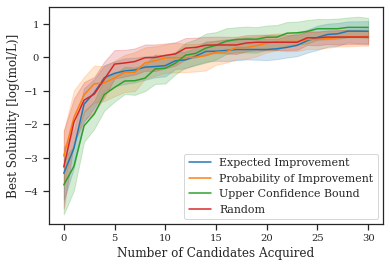

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style("white")
sns.set_palette('tab10')
sns.set_style("ticks")

from matplotlib import cm as cm
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots()

# plt.figure(figsize=(4, 3)) # (20, 10)
g = sns.lineplot(x="Number of Candidates Acquired", y="Best Solubility", hue="Acquisition Function",
                  data=best_df, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.set(ylabel='Best Solubility [log(mol/L)]')
# ax.tight_layout()
print('saving!')
fig.savefig(f'acqfn_{rep}_Adam_q10.png', dpi=500)

# g.legend(loc='center right', bbox_to_anchor=(1.85, 0.5), ncol=1)

# plt.figure(figsize=(4, 3)) # (20, 10)
# g = sns.lineplot(x="Step", y="Cumulative Regret", hue="Acquisition Function",
#                   data=best_df)
# # g.legend(loc='center right', bbox_to_anchor=(1.85, 0.5), ncol=1)

Grid format!

<Figure size 288x216 with 0 Axes>

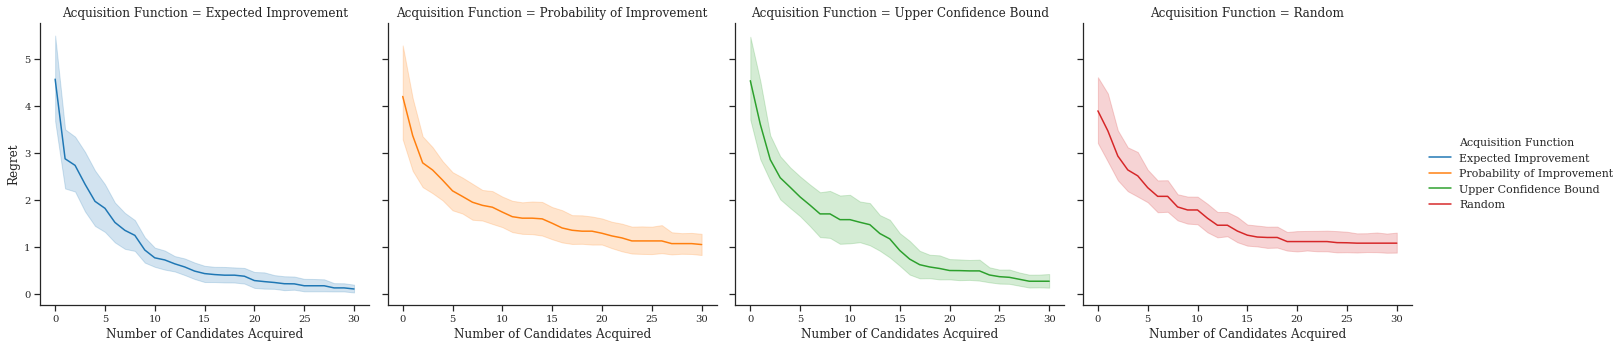

<Figure size 432x288 with 0 Axes>

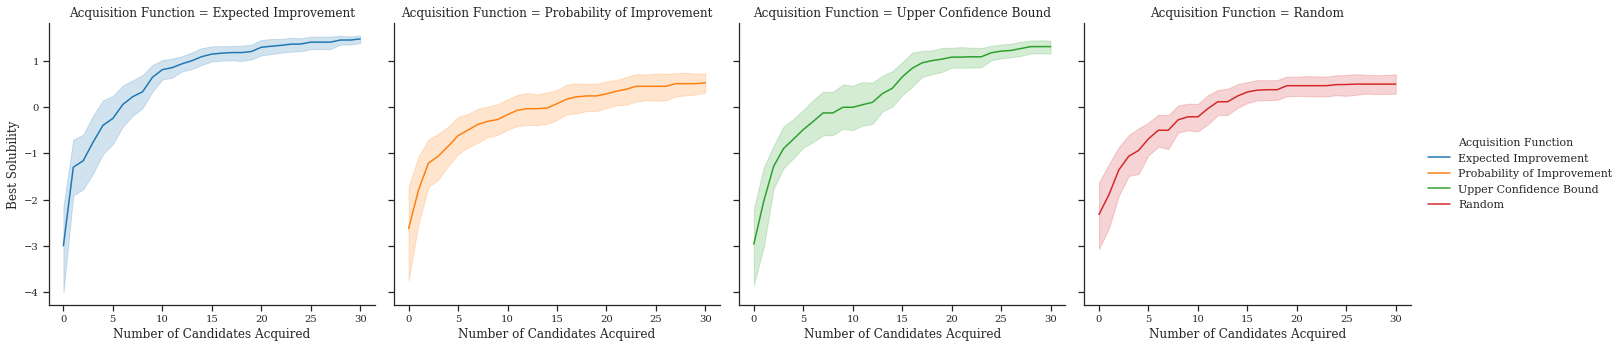

In [67]:
from matplotlib import cm as cm
colors = plt.get_cmap('tab10')
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.set_palette('tab10')

plt.figure(figsize=(4, 3)) # (20, 10)

g = sns.relplot(x="Number of Candidates Acquired", y="Regret",
                 col="Acquisition Function", hue="Acquisition Function",
                 kind="line", data=best_df)

plt.figure()
g = sns.relplot(x="Number of Candidates Acquired", y="Best Solubility",
                 col="Acquisition Function", hue="Acquisition Function",
                 kind="line", data=best_df)